# Binary Classification with Neural Network


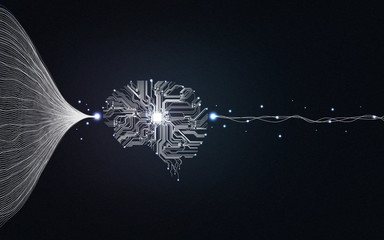

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [ ]:
train=pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
test=pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
print(train.shape)
train.head()

In [ ]:
train.nunique().sort_values(ascending=False)

In [ ]:
round(train.isnull().sum()*100/len(train),2).sort_values(ascending=False)


In [ ]:
y=train["Transported"]
train=train.drop(['PassengerId','Name','Transported'], axis=1)

In [ ]:
for i in train:
    train[i].fillna(train[i].mode()[0], inplace=True)

In [ ]:
obj=list(train.select_dtypes(['object']).columns)
obj

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for i in obj:
    train[i] = le.fit_transform(train[[i]])

In [ ]:
train

In [ ]:
sns.boxplot(data=train)

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
transformer = Normalizer().fit(train) 
transformer
train=transformer.transform(train)

In [ ]:
train

In [ ]:
y=y.astype(int)
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train, y, test_size=0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

opt = tf.keras.optimizers.SGD(learning_rate=0.01)
model = Sequential() 
model.add(Dense(121, activation='relu', input_dim=11))
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) 
model.summary()

In [ ]:
import graphviz
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
hist=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=1)

In [ ]:
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [ ]:
test.head(2)

In [ ]:
PassengerId=test["PassengerId"]
test=test.drop(['PassengerId','Name'], axis=1)

In [ ]:
test.isnull().sum().sort_values(ascending=False)

In [ ]:
for i in test:
    test[i].fillna(test[i].mode()[0], inplace=True)

In [ ]:
obj1=list(test.select_dtypes(['object']).columns)
obj1

In [ ]:
for i in obj1:
    test[i] = le.fit_transform(test[[i]])

In [ ]:
transformer = Normalizer().fit(test)  # fit does nothing.
transformer

test=transformer.transform(test)

In [ ]:
test

In [ ]:
sns.boxplot(data=test)

In [ ]:
y_pred = model.predict(test)
y_pred

In [ ]:
y_pred = [int(round(x[0])) for x in y_pred ]
y_pred[0:4]

In [ ]:
for i in range(len(y_pred)):
    y_pred[i]=bool (y_pred[i])
y_pred[0:4]

In [ ]:

# output = pd.DataFrame({'PassengerId': PassengerId, 'Transported': y_pred})

# output.to_csv(r'C:\Users\a\Desktop\sub.csv', index=False)

# print("Your submission was successfully saved!")